# Setting up the environment
# https://github.com/huangderful/CS190J-sections-code

Prereqs:
Install python @ https://www.python.org/downloads/ \
Install VSCode @ https://code.visualstudio.com/download

### 1. Virtual Environment Setup:

`python -m venv graph_env` \
Mac/Linux: `source graph_env/bin/activate` \
Windows: `graph_env\Scripts\activate`

### 2. Upgrade and install dependencies
`pip install --upgrade pip setuptools wheel` (Sometimes will receive an error, just run the suggested command)\
`pip install numpy scipy matplotlib networkx pandas` 

Sometimes you are given a `requirements.txt` which you can just \
 `pip install -r requirements.txt`

To generate a `requirements.txt` run \
`pip freeze > requirements.txt`

When collaborating, install via `requirements.txt` and git ignore the virtual env folder

#### 3. Top right of VSCode, click Select Kernel => Python Environments => graph_env
(When you run for the first time it will ask you to install ipykernel; do that and it might take a while)

# Linear Algebra / Numpy Review

In [57]:
import numpy as np
# Example: Adjacency Matrix
# Is A undirected or directed?
A = np.array([[0, 1, 0, 1], 
              [1, 0, 1, 0], 
              [0, 1, 0, 1],
              [1, 1, 1, 0]])
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 1 1 0]]


In [59]:
# What does a '2' in the Walk Matrix mean?
multiple_paths = np.linalg.matrix_power(A, 3)
print(multiple_paths)

[[1 4 1 4]
 [4 2 4 0]
 [1 4 1 4]
 [4 4 4 2]]


In [4]:
# Degree Matrix
D = np.diag(A.sum(axis=1))
print("Degree Matrix:\n", D)

Degree Matrix:
 [[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [43]:
# Laplacian Matrix
L = D - A
print("Laplacian Matrix:\n", L)

Laplacian Matrix:
 [[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1 -1 -1  3]]


In [ ]:
# Eigenvalues and Eigenvectors of the Laplacian representation
eigvals, eigvecs = np.linalg.eig(L)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)
# Basis of clustering

Eigenvalues: [-4.4408921e-16  2.0000000e+00  4.0000000e+00  3.0000000e+00]
Eigenvectors:
 [[ 5.00000000e-01  7.07106781e-01 -5.00000000e-01  3.77964473e-01]
 [ 5.00000000e-01 -3.42974852e-16  5.00000000e-01 -7.55928946e-01]
 [ 5.00000000e-01 -7.07106781e-01 -5.00000000e-01  3.77964473e-01]
 [ 5.00000000e-01  2.06869264e-16  5.00000000e-01  3.77964473e-01]]


In [ ]:
import networkx as nx
# https://networkx.org/documentation/stable/reference/index.html
import matplotlib.pyplot as plt

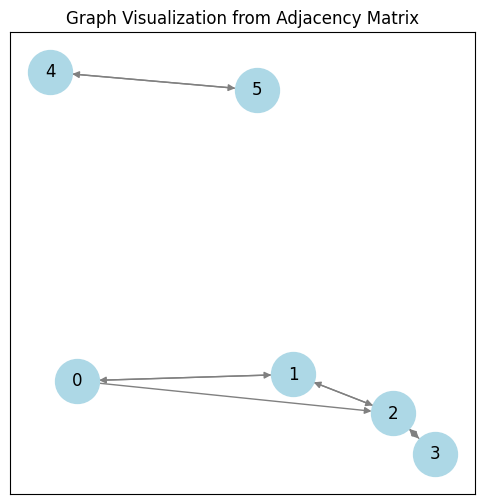

In [60]:
A = np.array([ [0, 1, 1, 0, 0, 0],
      [1, 0, 1, 0, 0, 0],
      [0, 1, 0, 1, 0, 0],
      [0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 1],
      [0, 0, 0, 0, 1, 0] ])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

# Draw the graph
plt.figure(figsize=(6,6))
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, arrows=True)
plt.title('Graph Visualization from Adjacency Matrix')
plt.show()

Laplacian Matrix:
 [[ 2 -1 -1  0  0  0]
 [-1  2 -1  0  0  0]
 [ 0 -1  2 -1  0  0]
 [ 0  0 -1  1  0  0]
 [ 0  0  0  0  1 -1]
 [ 0  0  0  0 -1  1]]
[0.         0.         0.         0.         0.70710678 0.70710678]


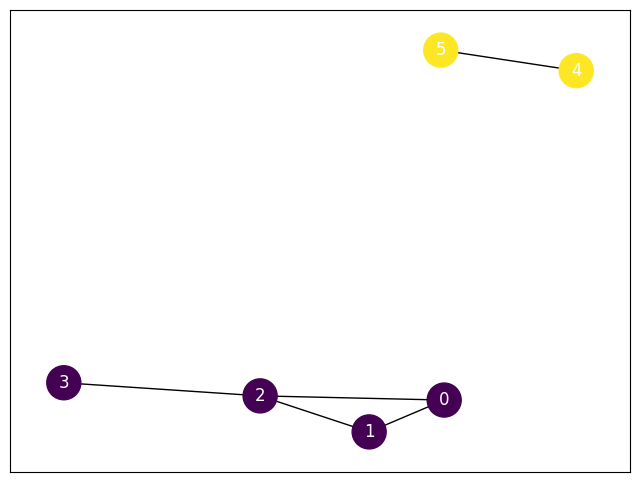

In [61]:
D = np.diag(A.sum(axis=1))
# Laplacian Matrix
L = D - A
print("Laplacian Matrix:\n", L)
eigvals, eigvecs = np.linalg.eig(L)
# Get indices that would sort the eigenvalues
sorted_indices = np.argsort(eigvals)
# The Fiedler vector corresponds to the second smallest eigenvalue
fiedler_vector = eigvecs[:, sorted_indices[1]].real
print(fiedler_vector)

G = nx.from_numpy_array(A)
pos = nx.spring_layout(G, seed=42)
# Draw nodes with colors based on Fiedler vector
# Define colormap
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=min(fiedler_vector), vmax=max(fiedler_vector))

# Plot graph
plt.figure(figsize=(8, 6))
nodes = nx.draw_networkx(
    G, pos, node_color=fiedler_vector, cmap=cmap, with_labels=True,
    node_size=600, font_color='white'
)
plt.show()


## Networkx is great for drawing AND running algorithms

[{0, 1, 2, 3}, {4, 5}]


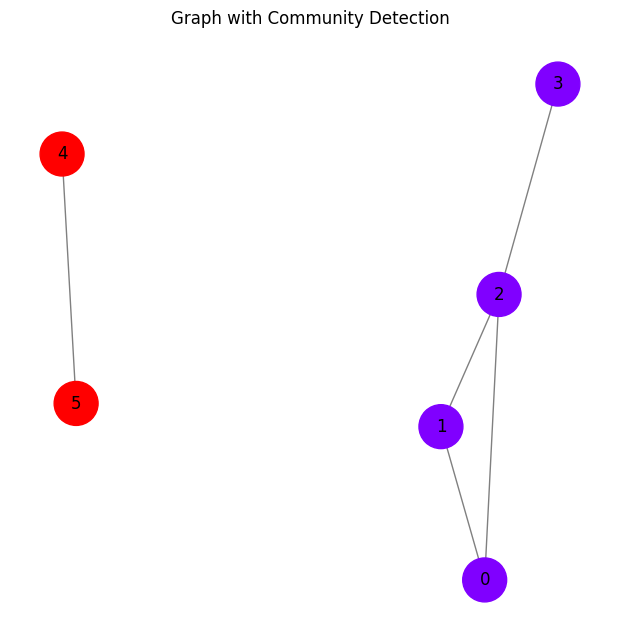

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain  # from python-louvain package

# Define the adjacency matrix
A = np.array([ [0, 1, 1, 0, 0, 0],
               [1, 0, 1, 0, 0, 0],
               [1, 1, 0, 1, 0, 0],
               [0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 1, 0] ])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Detect communities using the Louvain method
partition = nx.community.louvain_communities(G)
print(partition)

# Create a mapping of each node to its community index
node_community = {}
for i, community in enumerate(partition):
    for node in community:
        node_community[node] = i

# Draw the graph with communities shaded differently
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Define the layout for the nodes
colors = [node_community[node] for node in G.nodes()]  # Color by community

nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=1000, edge_color='gray')
plt.title('Graph with Community Detection')
plt.show()

In [ ]:
# Compute basic properties
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Degree Centrality:", nx.degree_centrality(G))
print("Shortest Path (1 to 3):", nx.shortest_path(G, source=1, target=3))

Nodes: [0, 1, 2, 3, 4, 5]
Edges: [(0, 1), (0, 2), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (4, 5), (5, 4)]
Degree Centrality: {0: 0.6000000000000001, 1: 0.8, 2: 1.0, 3: 0.4, 4: 0.4, 5: 0.4}
Shortest Path (1 to 4): [1, 2, 3]


### Bipartite Graphs

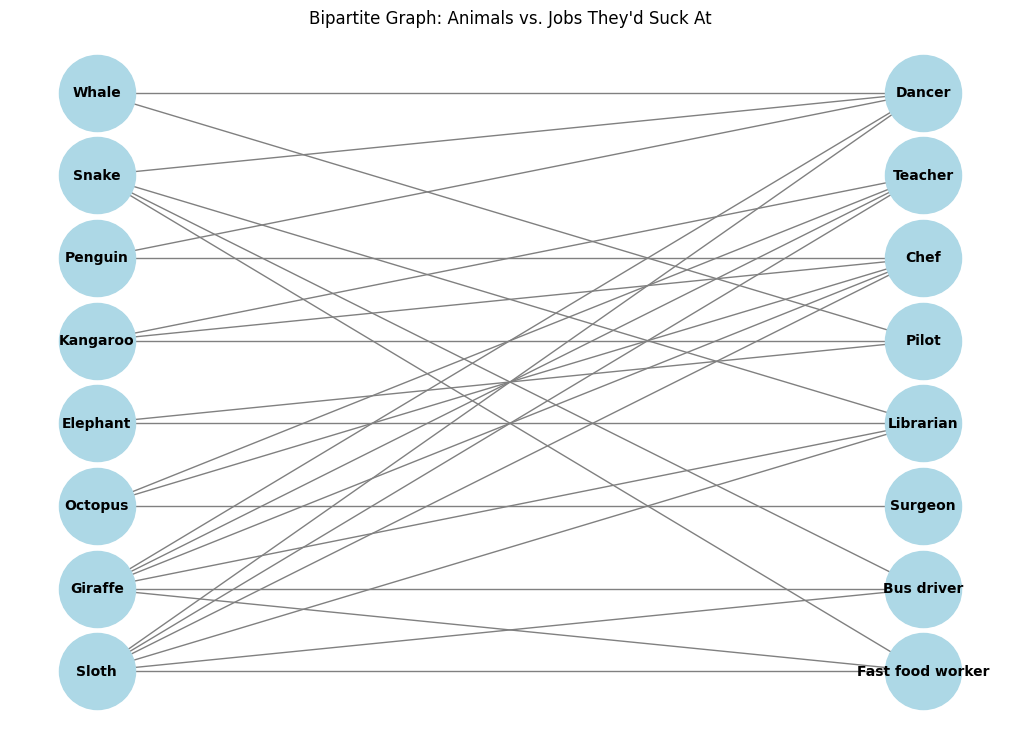

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
animals = ["Sloth", "Giraffe", "Octopus", "Elephant", "Kangaroo", "Penguin", "Snake", "Whale"]
jobs = ["Fast food worker", "Bus driver", "Surgeon", "Librarian", "Pilot", "Chef", "Teacher", "Dancer"]

# Create the bipartite graph
B = nx.Graph()

# Add nodes with bipartite attribute (0 for animals, 1 for jobs)
B.add_nodes_from(animals, bipartite=0)
B.add_nodes_from(jobs, bipartite=1)

# Add edges based on the incidence matrix
edges = [
    ("Sloth", "Fast food worker"), ("Sloth", "Bus driver"), ("Sloth", "Librarian"), 
    ("Sloth", "Chef"), ("Sloth", "Teacher"), ("Sloth", "Dancer"),
    ("Giraffe", "Fast food worker"), ("Giraffe", "Bus driver"), ("Giraffe", "Librarian"),
    ("Giraffe", "Chef"), ("Giraffe", "Teacher"), ("Giraffe", "Dancer"),
    ("Octopus", "Surgeon"), ("Octopus", "Chef"), ("Octopus", "Teacher"),
    ("Elephant", "Librarian"), ("Elephant", "Pilot"), ("Elephant", "Librarian"),
    ("Kangaroo", "Pilot"), ("Kangaroo", "Chef"), ("Kangaroo", "Teacher"),
    ("Penguin", "Chef"), ("Penguin", "Dancer"),
    ("Snake", "Fast food worker"), ("Snake", "Bus driver"), ("Snake", "Librarian"),
    ("Snake", "Dancer"), ("Whale", "Pilot"), ("Whale", "Dancer")
]

B.add_edges_from(edges)

# Positioning for bipartite layout (animals on the left, jobs on the right)
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(animals))  # animals on the left
pos.update((node, (1, i)) for i, node in enumerate(jobs))  # jobs on the right

# Draw the bipartite graph
plt.figure(figsize=(10, 7))
nx.draw(B, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Bipartite Graph: Animals vs. Jobs They'd Suck At")
plt.show()


In [ ]:
# Get the bipartite adjacency matrix for animals (0) and jobs (1)
adj_matrix = nx.bipartite.matrix.biadjacency_matrix(B, animals, jobs).todense()
print(adj_matrix)

[[1 1 0 1 0 1 1 1]
 [1 1 0 1 0 1 1 1]
 [0 0 1 0 0 1 1 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 1]
 [1 1 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 1]]


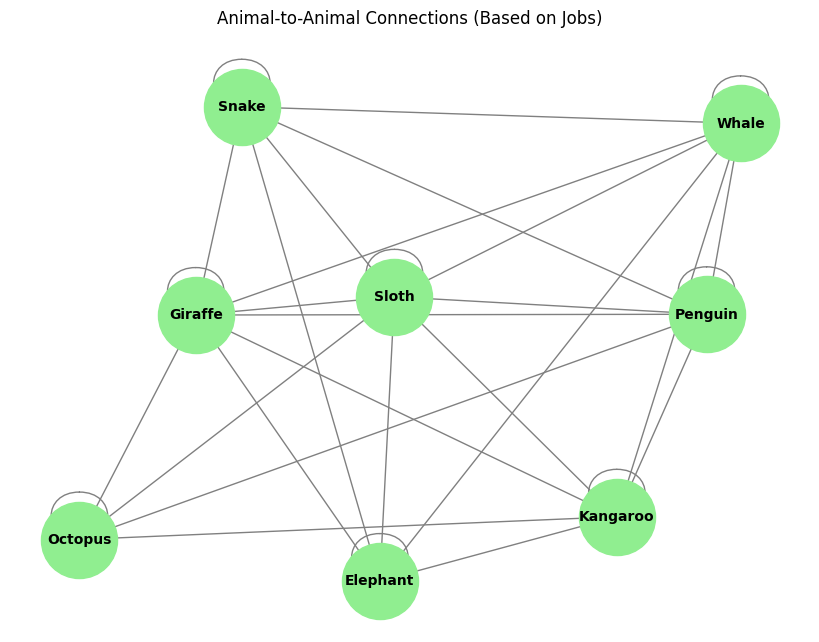

In [43]:

# Compute animal-to-animal connections by multiplying the adjacency matrix with its transpose
animal_connections = np.dot(adj_matrix, adj_matrix.T)

# Create a graph from the animal-to-animal connection matrix
G = nx.from_numpy_array(animal_connections)

# Set animal names as node labels
mapping = {i: animal for i, animal in enumerate(animals)}
G = nx.relabel_nodes(G, mapping)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Animal-to-Animal Connections (Based on Jobs)")
plt.show()

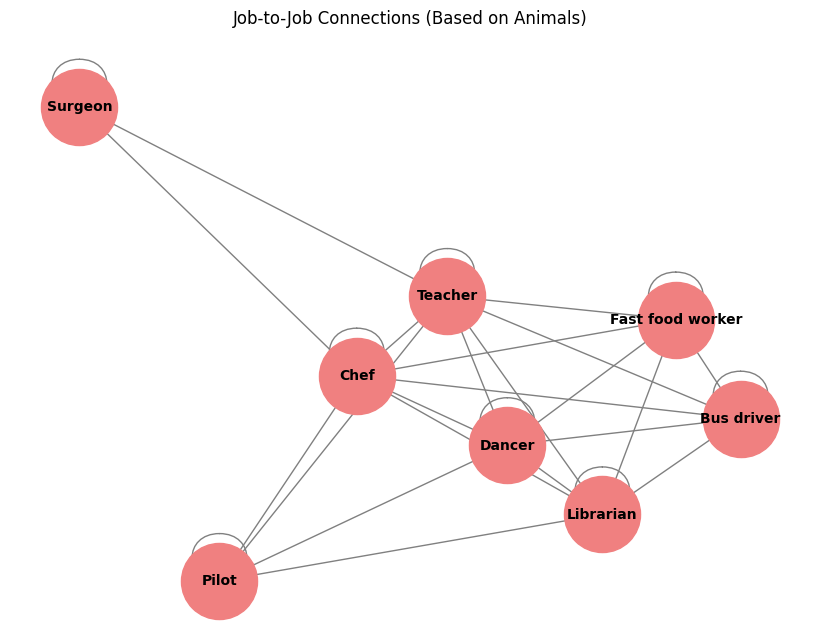

In [44]:
# Compute job-to-job connections by multiplying the transpose of the adjacency matrix with the original adjacency matrix
job_connections = adj_matrix.T @ adj_matrix

# Create a graph from the job-to-job connection matrix
G_jobs = nx.from_numpy_array(job_connections)

# Set job names as node labels
mapping_jobs = {i: job for i, job in enumerate(jobs)}
G_jobs = nx.relabel_nodes(G_jobs, mapping_jobs)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_jobs, with_labels=True, node_size=3000, node_color="lightcoral", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Job-to-Job Connections (Based on Animals)")
plt.show()

### Bipartite graphs can be represented as hypergraphs and vice versa!

In [ ]:
import pandas as pd
# pip install tqdm
import tqdm as tqdm
HUMANNET_PATH = "../../DATA/HumanNet-GSP.tsv"
HUMANNET = pd.read_csv(HUMANNET_PATH, sep="\t")

In [63]:
print(HUMANNET.head(10))
# print(HUMANNET[HUMANNET['Gene1'] == 54936])
print(HUMANNET[HUMANNET['Gene1'].isna()])

     Gene1  Gene2
0  54936.0   7405
1      NaN    306
2   6366.0   6370
3  11021.0  51199
4   4940.0   8372
5  10399.0   3304
6   5898.0   9294
7  10059.0  10134
8  22863.0  23130
9   9331.0   7357
   Gene1  Gene2
1    NaN    306


In [64]:
HUMANNET = HUMANNET[HUMANNET['Gene1'].notna()]

In [55]:
# Get the unique list of genes
genes = pd.unique(HUMANNET[['Gene1', 'Gene2']].values.ravel())

# Create a mapping of genes to indices for the adjacency matrix
gene_to_index = {gene: idx for idx, gene in enumerate(genes)}

# Initialize a directed adjacency matrix of zeros
adj_matrix = np.zeros((len(genes), len(genes)), dtype=int)

# Fill the adjacency matrix based on HumanNet edges (directed)
for _, row in tqdm.tqdm(HUMANNET.iterrows(), total=len(HUMANNET), desc="Processing rows"):
    i, j = gene_to_index[row["Gene1"]], gene_to_index[row["Gene2"]]
    adj_matrix[i, j] = 1  # Directed edge from Gene1 → Gene2

Processing rows: 100%|██████████| 260961/260961 [00:09<00:00, 26345.96it/s]


In [31]:
print(adj_matrix)
print(gene_to_index)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{np.float64(54936.0): 0, np.float64(7405.0): 1, np.float64(6366.0): 2, np.float64(6370.0): 3, np.float64(11021.0): 4, np.float64(51199.0): 5, np.float64(4940.0): 6, np.float64(8372.0): 7, np.float64(10399.0): 8, np.float64(3304.0): 9, np.float64(5898.0): 10, np.float64(9294.0): 11, np.float64(10059.0): 12, np.float64(10134.0): 13, np.float64(22863.0): 14, np.float64(23130.0): 15, np.float64(9331.0): 16, np.float64(7357.0): 17, np.float64(1514.0): 18, np.float64(4193.0): 19, np.float64(10367.0): 20, np.float64(3276.0): 21, np.float64(25805.0): 22, np.float64(55171.0): 23, np.float64(23613.0): 24, np.float64(23671.0): 25, np.float64(10213.0): 26, np.float64(6118.0): 27, np.float64(5371.0): 28, np.float64(8517.0): 29, np.float64(26001.0): 30, np.float64(26471.0): 31, np.float64(10988.0): 32, np.float64(84301.0): 33, np.float64(2264.0): 34, np.float64(8452.0): 35, np.floa